In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [2]:
Titanic=pd.read_csv(r"C:\Users\Dell\Downloads\Titanic dataset.csv")

In [3]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


pre processing

dropping features not necessary for the analysis

In [5]:
Titanic.drop(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [6]:
Titanic

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S
...,...,...,...,...
886,0,male,27.0,S
887,1,female,19.0,S
888,0,female,NaN,S
889,1,male,26.0,C


BASIC EDA

In [7]:
Titanic.columns

Index(['Survived', 'Sex', 'Age', 'Embarked'], dtype='object')

In [8]:
Titanic.shape

(891, 4)

In [9]:
Titanic.info

<bound method DataFrame.info of      Survived     Sex   Age Embarked
0           0    male  22.0        S
1           1  female  38.0        C
2           1  female  26.0        S
3           1  female  35.0        S
4           0    male  35.0        S
..        ...     ...   ...      ...
886         0    male  27.0        S
887         1  female  19.0        S
888         0  female   NaN        S
889         1    male  26.0        C
890         0    male  32.0        Q

[891 rows x 4 columns]>

In [10]:
Titanic.describe(include='all')

,Survived,Sex,Age,Embarked
count,891.000000,891,714.000000,889
unique,NaN,2,NaN,3
top,NaN,male,NaN,S
freq,NaN,577,NaN,644
mean,0.383838,NaN,29.699118,NaN
std,0.486592,NaN,14.526497,NaN
min,0.000000,NaN,0.420000,NaN
25%,0.000000,NaN,20.125000,NaN
50%,0.000000,NaN,28.000000,NaN
75%,1.000000,NaN,38.000000,NaN


Basic visualisations

Univariate Analysis

In [ ]:
Distribution plots

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


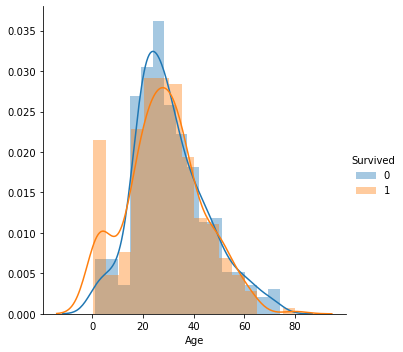

In [11]:
sns.FacetGrid(Titanic, hue= 'Survived', size=5).map(sns.distplot,'Age').add_legend()

from the above graph, it can be deduced that people between age 20 to 40  have more survival rate

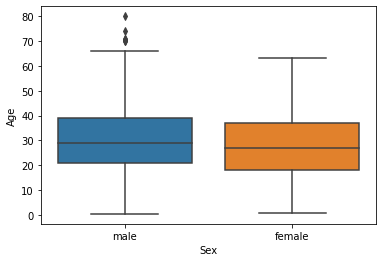

In [12]:
sns.boxplot(x="Sex", y= "Age", data=Titanic)
plt.show()

In [ ]:
this shows that we have more male passengers between the ages of 20 to 40 and also more older males while females are between ages of 20 and 40 but less older females.

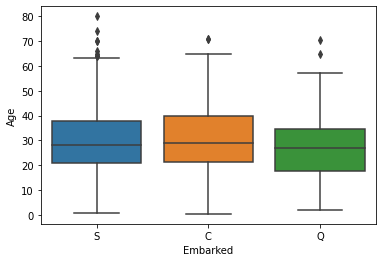

In [13]:
sns.boxplot(x="Embarked", y= "Age", data=Titanic)
plt.show()

In [ ]:
passengers that embarked from port S were between the ages of 20 to 40 also more older people, those that embarked from port C were between the ages of 30 to 40 with  a few old people and  while those that embarked from port Q were between the 

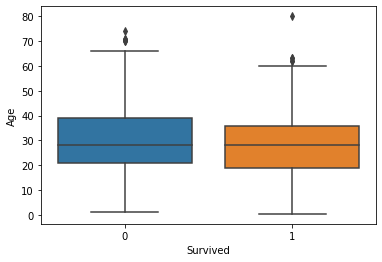

In [14]:
sns.boxplot(x="Survived", y="Age", data=Titanic)
plt.show()

the survival rate is higher for those between ages 20 and 40 with less older passenger while more older people and people between the age of 30 and 40 didnot survive.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

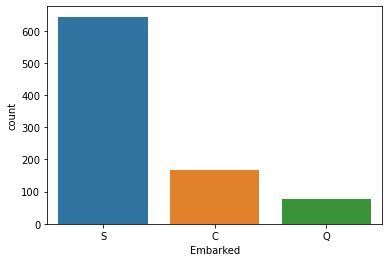

In [15]:
sns.countplot(x='Embarked', data=Titanic)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


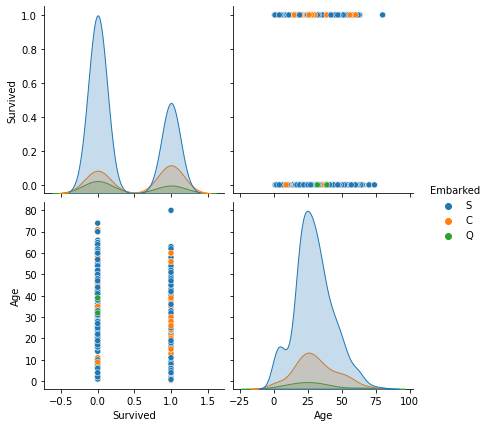

In [16]:
sns.pairplot(Titanic, hue='Embarked', size=3)
plt.show()

observations
survival rate: most people that did not survive the shipwreck embarked from the S port, followed by the C port and then the Q port. also passengers that survived were more from the S port then the C port and then the Q port
Age:Passengers between the ages of 25 and 50 embarked more. Passengers that embarked from the S port were the highest in number, then the C port while the Q port has the lowest number of embarkment.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


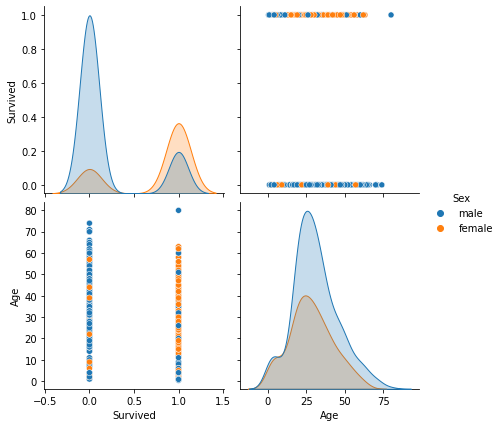

In [17]:
sns.pairplot(Titanic, hue='Sex', size=3)
plt.show()

Observation
    survival rate: among those that did not survive, majority were males and less females, also majority of those that survived were females as compared to male.
    Age: the females that embarked were between the ages of 25 to 60 while males were between the ages of 25 to 75 and there were more males than females.

Data Preprocesing

Converting Object Datatype to float

In [18]:
Titanic['Sex']= pd.to_numeric(Titanic['Sex'], errors = 'coerce')
Titanic['Embarked']= pd.to_numeric(Titanic['Embarked'], errors = 'coerce')

In [19]:
Titanic['Survived'].mean

<bound method Series.mean of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [20]:
Titanic['Sex'].mean

<bound method Series.mean of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Sex, Length: 891, dtype: float64>

In [21]:
Titanic['Age'].mean

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [22]:
Titanic['Embarked'].mean

<bound method Series.mean of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Embarked, Length: 891, dtype: float64>

In [23]:
Titanic.isnull().sum()

Survived      0
Sex         891
Age         177
Embarked    891
dtype: int64

In [24]:
mean_Age=np.round(Titanic.Age.mean())
mean_Age

30.0

<AxesSubplot:xlabel='Age', ylabel='Density'>

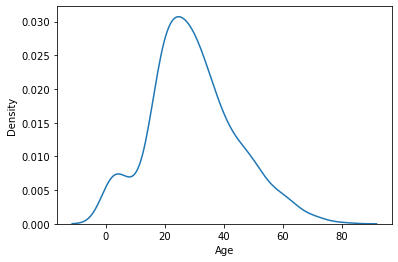

In [25]:
sns.kdeplot(Titanic.Age)

In [27]:
Titanic.Age.fillna(mean_Age,inplace=True)

In [28]:
Titanic.replace([np.inf, -np.inf], np.nan,inplace=True)
Titanic.fillna(1, inplace=True)

In [29]:
Titanic.head()

,Survived,Sex,Age,Embarked
0,0,1.0,22.0,1.0
1,1,1.0,38.0,1.0
2,1,1.0,26.0,1.0
3,1,1.0,35.0,1.0
4,0,1.0,35.0,1.0


In [30]:
X=Titanic.drop(['Survived'], axis='columns')
y=Titanic['Survived']

In [31]:
X.head()

,Sex,Age,Embarked
0,1.0,22.0,1.0
1,1.0,38.0,1.0
2,1.0,26.0,1.0
3,1.0,35.0,1.0
4,1.0,35.0,1.0


In [32]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

One hot encoding

In [33]:
pd.get_dummies(X)

,Sex,Age,Embarked
0,1.0,22.0,1.0
1,1.0,38.0,1.0
2,1.0,26.0,1.0
3,1.0,35.0,1.0
4,1.0,35.0,1.0
...,...,...,...
886,1.0,27.0,1.0
887,1.0,19.0,1.0
888,1.0,30.0,1.0
889,1.0,26.0,1.0


In [34]:
X.shape

(891, 3)

spliting the data into training and test set

In [35]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1234)

Model Training

using logistic regression

In [36]:
logisticmodel=LogisticRegression()

In [37]:
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [38]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

making a prediction

In [40]:
logistic_prediction=logisticmodel.predict(X_test)

Model Evaluation

In [41]:
y_pred=pd.Series(logisticmodel.predict(X_test))
y_test= y_test.reset_index(drop=True)
z=pd.concat([y_test, y_pred], axis=1)
z.columns= ['True', 'Prediction']
z.head()

,True,Prediction
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0


Using a confusion matrix

In [44]:
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize=10)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize=10)
    plt.title('A confusion matrix')

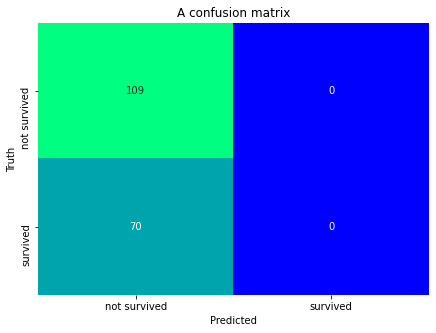

In [45]:
ConfusionMatrix(y_test, logistic_prediction, label=['not survived', 'survived'])

interpretation of the Logistic Regression model evaluation peformance

we have 109 True negatives, which predicted that the clients will not survive the shipwreck and they did not suvrive the shipwreck
we have 70 false negatives, which predicted that the clients will not survive but the clients survived the shipwreck

Checking the accuracy

In [46]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6089385474860335

the accuracy of the model is 60%

using f1 score

In [47]:
metrics.f1_score(y_test, logistic_prediction)

0.0

using Naive Bayes Model

In [48]:
naivemodel=GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [49]:
naivemodel_prediction=naivemodel.predict(X_test)
naivemodel_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

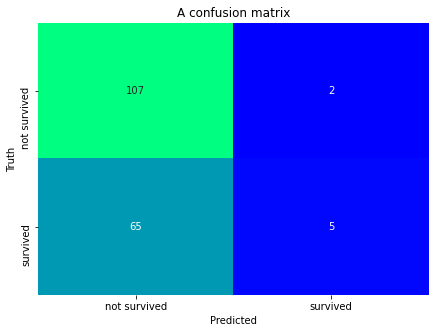

In [50]:
ConfusionMatrix(y_test, naivemodel_prediction, label =['not survived', 'survived'])

Interpretation of the Naive Bayes model evaluation performance

we have 107 true negatives,predicting that the clients will not survive the shipwreck and they did not survive
we have 65 false negatives, predicting that the clients will not survive but they did survived.
we have 2 false positives, predicting that the clients will survive but they did not survive
we have 5 true positives, predicting that the clients will survive and they did survived.

checking the model accuracy

In [52]:
metrics.accuracy_score(y_test, naivemodel_prediction)

0.6256983240223464

the model accuracy is 62%

using f1 score

In [51]:
metrics.f1_score(y_test, naivemodel_prediction)

0.12987012987012989

Random Forest Model

In [53]:
randomforestmodel=RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)
randomforestmodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

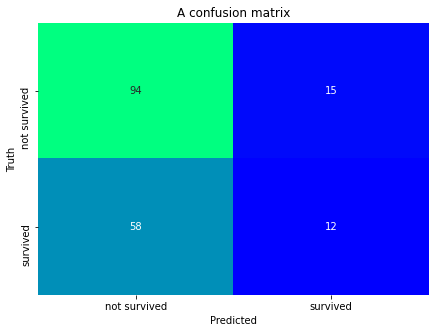

In [55]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ['not survived', 'survived'])

we have 94 true negatives,predicting that the clients will not survive the shipwreck and they did not survive
we have 58 false negatives, predicting that the clients will not survive but they did survived.
we have 15 false positives, predicting that the clients will survive but they did not survive
we have 12 true positives, predicting that the clients will survive and they did survived.

Evaluation metrics 

In [56]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.5921787709497207

the accuracy is 59%

In [57]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.2474226804123711

In [61]:
xgbboostmodel = XGBClassifier(use_label_encoder=False)
xgbboostmodel = xgbboostmodel.fit(X_train, y_train)

[15:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
xgbboostmodel_prediction= xgbboostmodel.predict(X_test)
xgbboostmodel_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

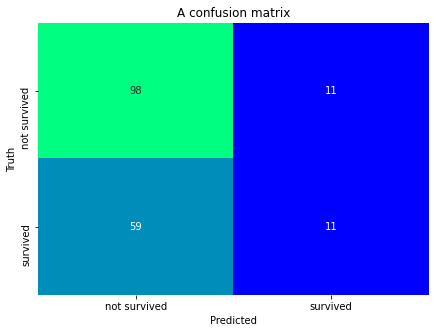

In [64]:
ConfusionMatrix(y_test, xgbboostmodel_prediction, label= ['not survived', 'survived'])

we have 98 true negatives,predicting that the clients will not survive the shipwreck and they did not survive
we have 59 false negatives, predicting that the clients will not survive but they did survived.
we have 11 false positives, predicting that the clients will survive but they did not survive
we have 11 true positives, predicting that the clients will survive and they did survived.

In [65]:
metrics.accuracy_score(y_test, xgbboostmodel_prediction)

0.6089385474860335

In [66]:
metrics.f1_score(y_test, xgbboostmodel_prediction)

0.2391304347826087